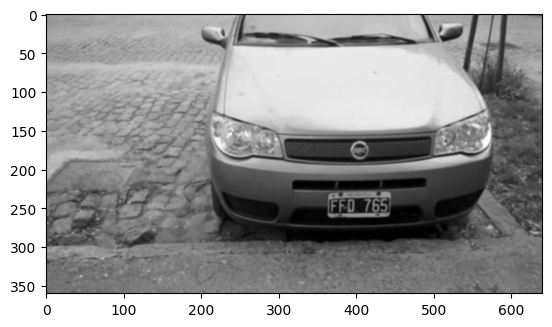

In [25]:
import os 
import cv2
from matplotlib import pyplot as plt 

IMG_DIR = "images/Patentes"
PLATE_IMG_NAMES = os.listdir(IMG_DIR)

plate_imgs = []

for f in PLATE_IMG_NAMES:
    img = cv2.imread( IMG_DIR + "/" + f )
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_blur_img = cv2.GaussianBlur(img_gray, ksize=(3, 3), sigmaX=1, sigmaY=1)
    plate_imgs.append( {
        "img":img,
        "img_gray": img_gray,
        "img_blur": img_blur_img
    } )


plt.imshow(plate_imgs[0]["img_blur"], cmap="gray")


In [77]:
def plot_images(imgs: list, n_cols=3, cmap: str  = "gray" , fsize=(50,50), sharex=True, sharey=True):

    n_rows=int( round(len(plate_imgs)/n_cols) )
    fig,axs = plt.subplots(n_cols,n_rows, figsize=fsize, sharex=sharex, sharey=sharey)
    i=0
    for c in range(0, n_cols):
        for r in range(0,n_rows):
            if c*r > len(imgs):
                break 
            else:
                axs[c,r].imshow(imgs[i], cmap=cmap)
                i+=1

In [ ]:
def detect_plates(imgs: list, kernel_size: tuple = (13,5), morph : int = cv2.MORPH_RECT, clt: int =180, cmt: int =300, cas: int = 3, cl2gradient=True ):
    kernel = cv2.getStructuringElement(morph,kernel_size)

    morph_imgs = []
    canny_imgs=[]
    plates_coords = []

    for img in plate_imgs:
        blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
        canny_img =cv2.Canny(blackhat, clt, cmt, apertureSize=cas, L2gradient=cl2gradient)
        canny_imgs.append(canny_img)
    
    return {
        "morph" : morph_imgs,
        "canny": canny_imgs,
        "coords": plates_coords
    }

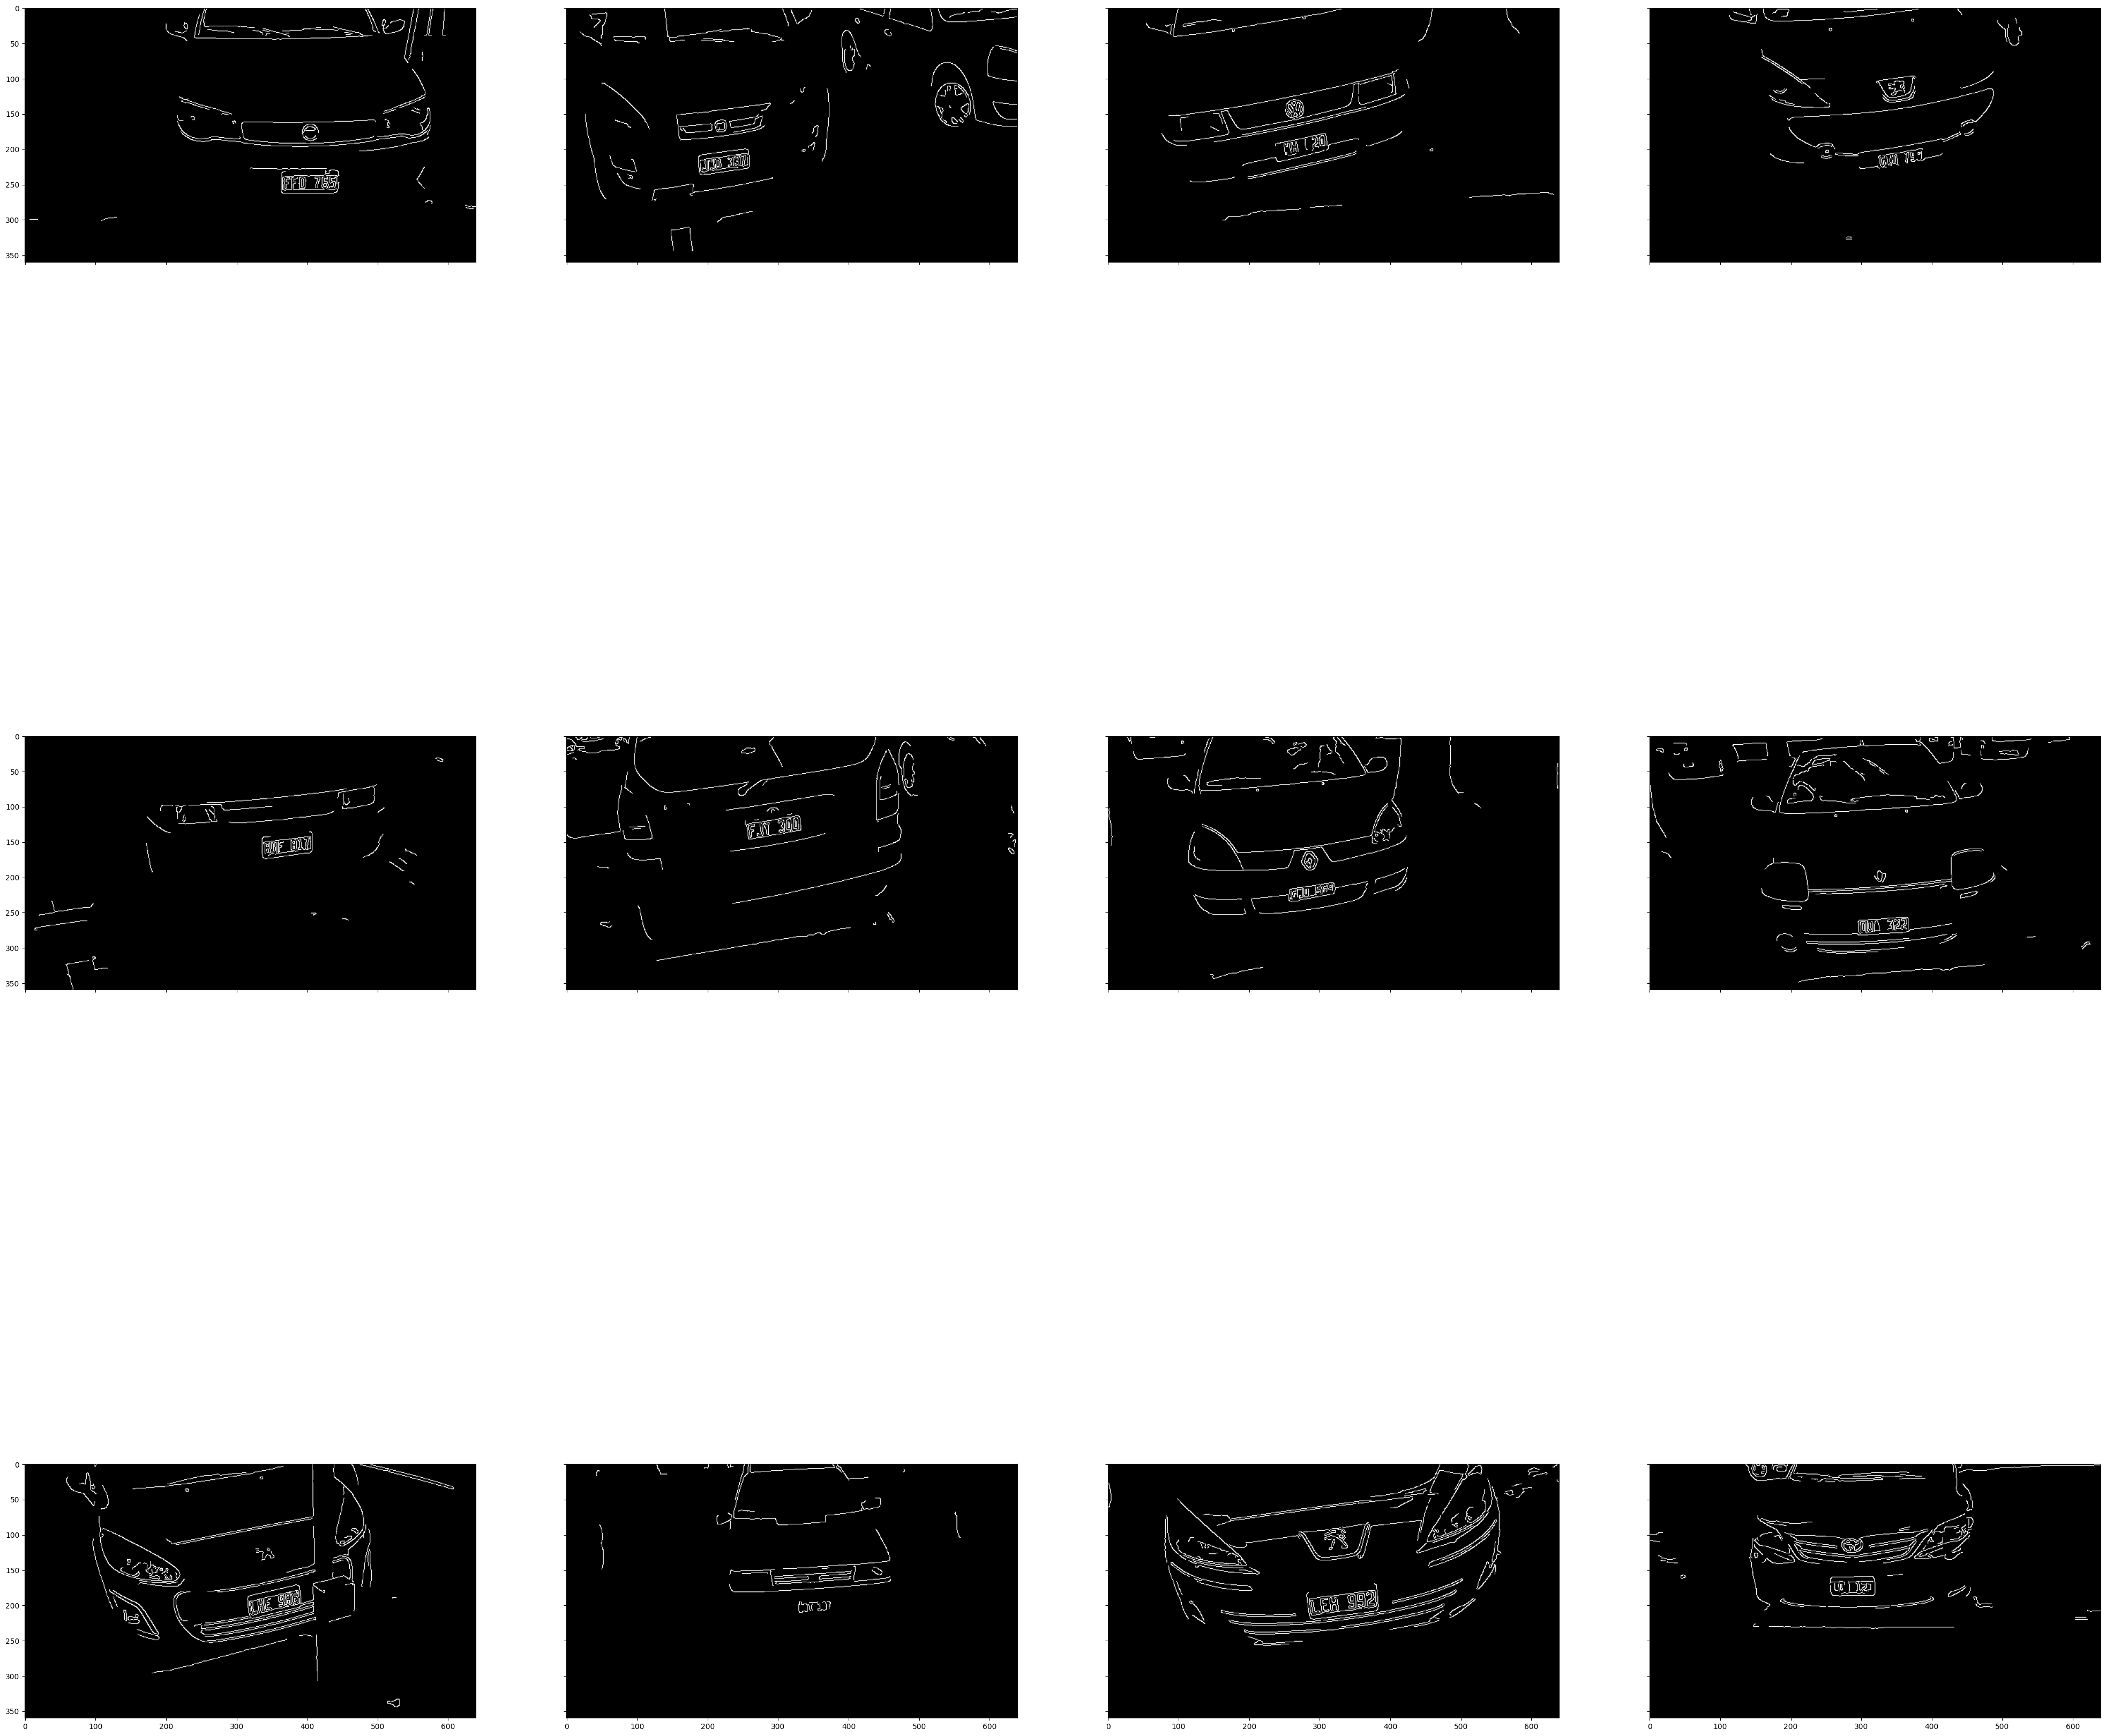

In [78]:
canny_imgs = []



plot_images(canny_imgs)

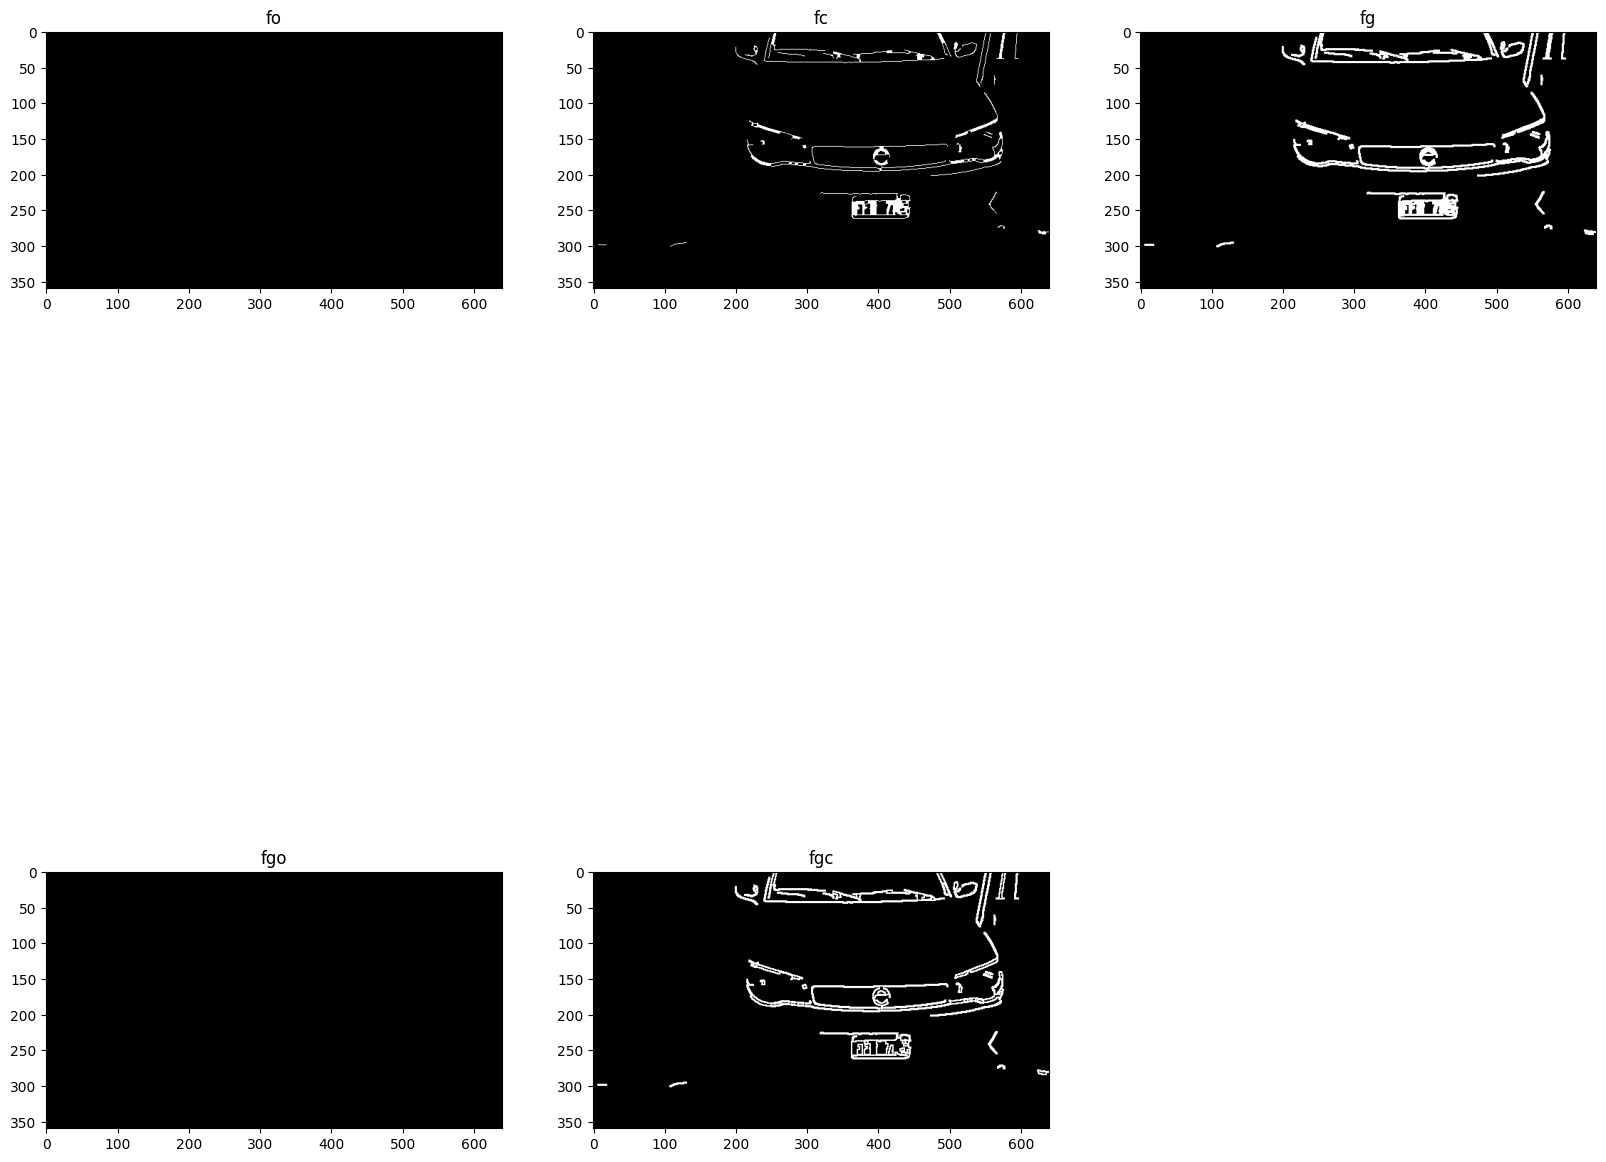

In [44]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))

morph = {}
blackhat = cv2.morphologyEx(canny_img, cv2.MORPH_BLACKHAT, kernel)
morph["fo"] = cv2.morphologyEx(canny_img, cv2.MORPH_OPEN, kernel)
morph["fc"] = cv2.morphologyEx(canny_img, cv2.MORPH_CLOSE, kernel)
morph["fg"] = cv2.morphologyEx(canny_img, cv2.MORPH_GRADIENT, kernel)
morph["fgo"] = cv2.morphologyEx(morph["fo"], cv2.MORPH_GRADIENT, kernel)
morph["fgc"] = cv2.morphologyEx(morph["fc"], cv2.MORPH_GRADIENT, kernel)


plt.figure(figsize=(20,20))
sub_plot_id=230

for key, value in morph.items():
    sub_plot_id +=1 
    plt.subplot(sub_plot_id, title=key)
    plt.imshow(value, cmap="gray")